
# Solar Data EDA - Sierraleone
**Branch:** `eda_sierraleone`
**Objective:** Clean and profile solar dataset for regional ranking
**Key Files:**
- Input: `data/sierraleone-bumbuna.csv` (gitignored)
- Output: `data/clean/sierraleone_clean.csv` (gitignored)

###1.  setup and load data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

sierraleone_df = pd.read_csv('../data/sierraleone-bumbuna.csv', parse_dates=['Timestamp'])

print(f"sierraleone solar data shape: {sierraleone_df.shape}")
print(f"sierraleone solar data szie: {sierraleone_df.size}")
print(f"sierraleone solar data columns: {sierraleone_df.columns}")
print(sierraleone_df.head())



sierraleone solar data shape: (525600, 19)
sierraleone solar data szie: 9986400
sierraleone solar data columns: Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')
            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1 2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2 2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3 2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4 2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3

### 2. describe the data to get the sierraleone solar data stats details

In [31]:
sierraleone_df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-30 12:00:30.000000768,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
min,2021-10-30 00:01:00,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,2022-01-29 06:00:45,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,2022-04-30 12:00:30,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN


### 3. sierraleone solar data info

In [32]:
sierraleone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

### 4. Check for duplicate timestamps

In [33]:
dup_timestamps = sierraleone_df[sierraleone_df.duplicated(subset=['Timestamp'], keep=False)]
print(f"Duplicate timestamps: {dup_timestamps}")

Duplicate timestamps: Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, Comments]
Index: []


### 5. No duplicate, so use timestamp as index



In [34]:
sierraleone_df.set_index('Timestamp', inplace=True)
print(sierraleone_df.head())

                     GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

                     WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  \
Timestamp                                                                   
2021-10-30 00:01:00      0.0  0.0      0.0  1002         0            0.0   
2021-10-30 00:02:00      0.0  0.0      0.0  1002         0            0.0   
2021-10-30 00:03:00      0.0  0.0      0.0  1002         0            0.0   
2021-10-30 00:04:00      0.0  0.0      0.0  1002         0            0.1   
2021-10-30 0

#### 6. Missing data report

In [35]:
missing = sierraleone_df.isna().sum()

print(f"Missing values: {missing}")
threshold = 0.05 * len(sierraleone_df)
print(f"threshold", threshold)
print("Columns with >5% missing values:\n", missing[missing > threshold])


Missing values: GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
threshold 26280.0
Columns with >5% missing values:
 Comments    525600
dtype: int64


### 7.  Z-scores

In [36]:
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores   = np.abs(zscore(sierraleone_df[cols_to_check].dropna()))
print(f"z_scores: {z_scores}")

z_scores:                           GHI       DNI       DHI      ModA      ModB  \
Timestamp                                                               
2021-10-30 00:01:00  0.678931  0.532701  0.720500  0.686758  0.685782   
2021-10-30 00:02:00  0.678931  0.532701  0.720500  0.686758  0.685782   
2021-10-30 00:03:00  0.678931  0.532701  0.720500  0.686758  0.685782   
2021-10-30 00:04:00  0.678931  0.532243  0.720500  0.686758  0.685782   
2021-10-30 00:05:00  0.678931  0.532701  0.720500  0.686758  0.685782   
...                       ...       ...       ...       ...       ...   
2022-10-29 23:56:00  0.681946  0.532701  0.733712  0.686758  0.685782   
2022-10-29 23:57:00  0.682281  0.532701  0.734342  0.686758  0.685782   
2022-10-29 23:58:00  0.682281  0.532701  0.734971  0.686758  0.685782   
2022-10-29 23:59:00  0.682281  0.533158  0.736229  0.686758  0.685782   
2022-10-30 00:00:00  0.682281  0.532701  0.736858  0.686758  0.685782   

                           WS    WSgust 

### 8. Outliers detection


In [37]:

outliers = (z_scores > 3).any(axis=1)
sierraleone_df['CleaningFlag'] = outliers
print(f"outliers: {outliers}")
print(sierraleone_df["CleaningFlag"].value_counts())
outlier_rows =sierraleone_df[sierraleone_df['CleaningFlag']]
outlier_rows.head()



outliers: Timestamp
2021-10-30 00:01:00    False
2021-10-30 00:02:00    False
2021-10-30 00:03:00    False
2021-10-30 00:04:00    False
2021-10-30 00:05:00    False
                       ...  
2022-10-29 23:56:00    False
2022-10-29 23:57:00    False
2022-10-29 23:58:00    False
2022-10-29 23:59:00    False
2022-10-30 00:00:00    False
Length: 525600, dtype: bool
CleaningFlag
False    509308
True      16292
Name: count, dtype: int64


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,CleaningFlag
Timestamp,,,,,,,,,,,,,,,,,,,
2021-10-30 10:54:00,814.0,257.0,594.3,878.0,856.0,25.9,85.3,0.5,1.1,0.5,81.4,7.9,1002,0,0.0,50.4,45.6,NaN,True
2021-10-30 10:55:00,826.0,263.5,599.6,883.0,861.0,26.0,85.4,1.7,2.4,0.4,74.6,12.1,1002,0,0.0,51.6,46.6,NaN,True
2021-10-30 10:56:00,851.0,285.0,605.9,912.0,890.0,26.0,84.2,1.6,2.1,0.5,66.4,14.6,1002,0,0.0,52.4,47.0,NaN,True
2021-10-30 10:57:00,823.0,254.8,603.9,878.0,856.0,26.0,85.3,0.8,1.6,0.6,90.2,7.0,1002,0,0.0,53.4,47.7,NaN,True
2021-10-30 10:58:00,810.0,244.5,598.8,864.0,843.0,26.1,85.7,0.6,1.6,0.6,108.5,7.9,1002,0,0.0,54.6,48.6,NaN,True


#### 9. Impute and clean

In [38]:
sierraleone_clean = sierraleone_df.copy()
sierraleone_clean[cols_to_check] = sierraleone_clean[cols_to_check].fillna(sierraleone_clean[cols_to_check].mean())
sierraleone_clean.head



<bound method NDFrame.head of                      GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
Timestamp                                                                  
2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...   ...   ...   ...    ...  ...     ...   
2022-10-29 23:56:00 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
2022-10-29 23:57:00 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
2022-10-29 23:58:00 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
2022-10-29 23:59:00 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
2022-10-30 00:00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.

### 10. save or export clean data

In [39]:
sierraleone_clean.to_csv('../data/clean/sierraleone_clean.csv', index=False)

### 11. Time Series Analysis

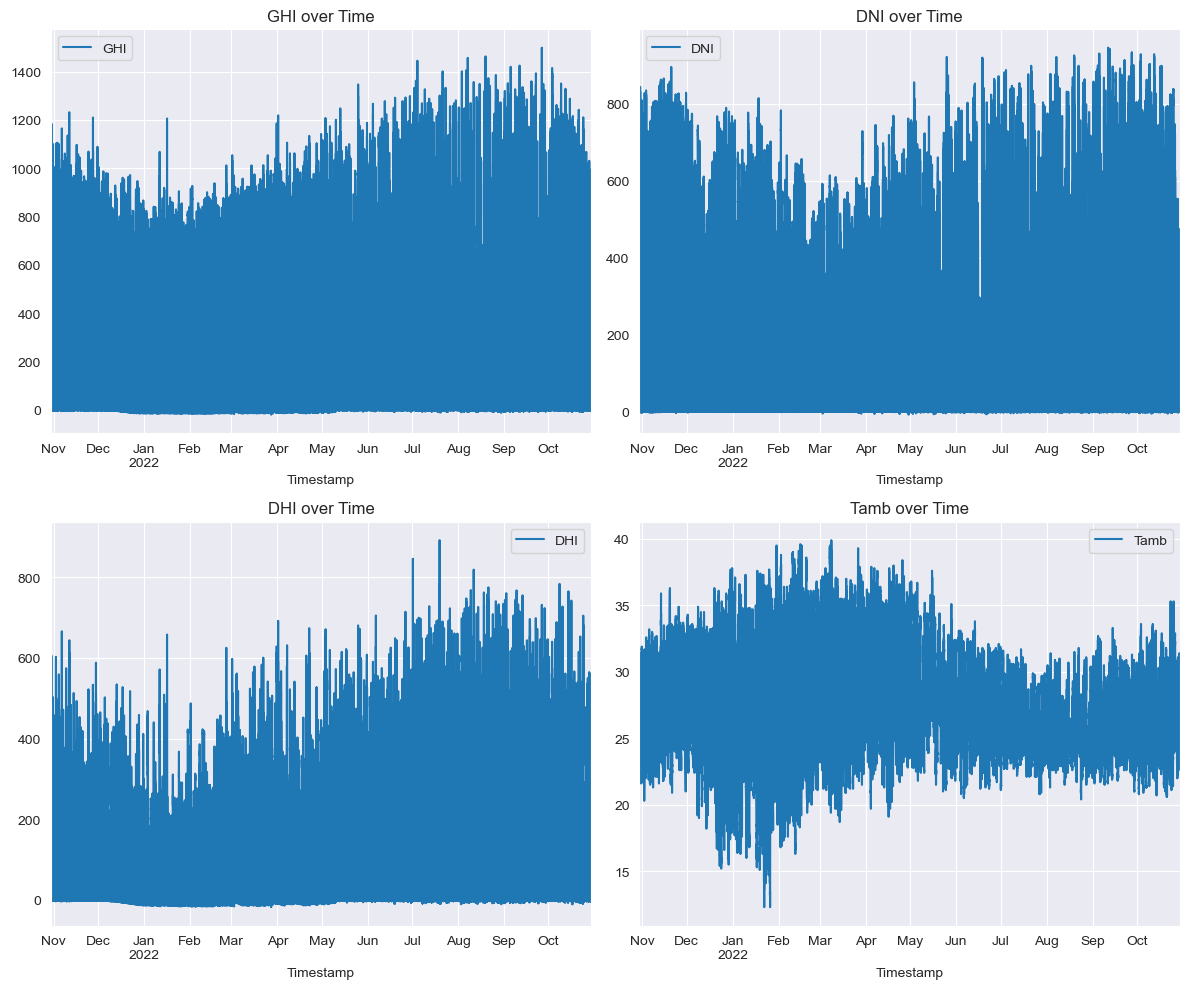

In [40]:
flg, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sierraleone_clean[['GHI']].plot(ax=axs[0,0], title="GHI over Time")
sierraleone_clean[['DNI']].plot(ax=axs[0,1], title="DNI over Time")
sierraleone_clean[['DHI']].plot(ax=axs[1,0], title="DHI over Time")
sierraleone_clean[['Tamb']].plot(ax=axs[1,1], title="Tamb over Time")
plt.tight_layout()

### 12 . cleaning effect

<Axes: title={'center': 'ModA & ModB: Clean vs Dirty'}, xlabel='CleaningFlag'>

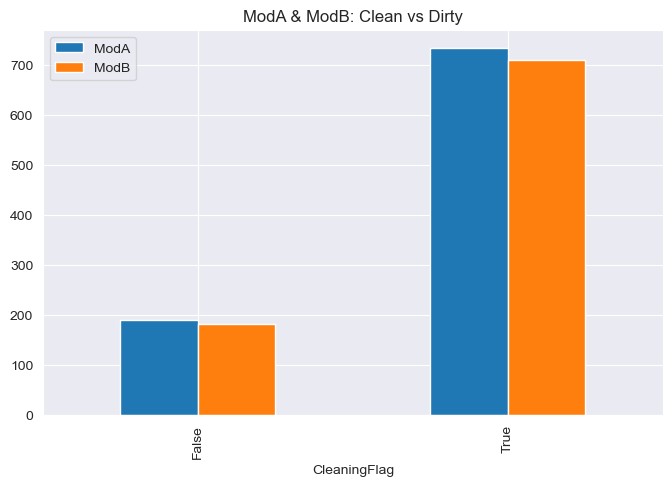

In [41]:
sierraleone_df.groupby('CleaningFlag')[['ModA', 'ModB']].mean().plot(kind='bar', title="ModA & ModB: Clean vs Dirty", figsize=(8,5))


#### 13. Correlation Heatmap

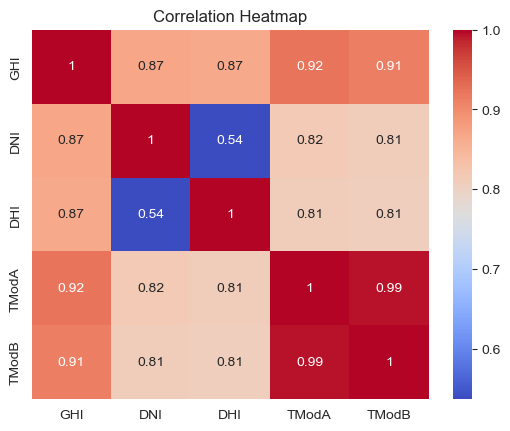

In [42]:

heat_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Check if all columns exist
if all(col in sierraleone_clean.columns for col in heat_cols):
    sns.heatmap(sierraleone_clean[heat_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    missing = [col for col in heat_cols if col not in sierraleone_clean.columns]
    print(f"Missing columns in dataset: {missing}")


### 14. Scater plot

<Axes: xlabel='WS', ylabel='GHI'>

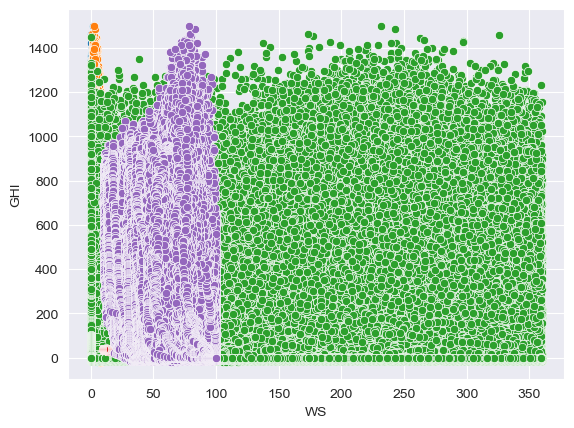

In [43]:
sns.scatterplot(data=sierraleone_clean, x='WS', y='GHI')
sns.scatterplot(data=sierraleone_clean, x='WSgust', y='GHI')
sns.scatterplot(data=sierraleone_clean, x='WD', y='GHI')
sns.scatterplot(data=sierraleone_clean, x='RH', y='Tamb')
sns.scatterplot(data=sierraleone_clean, x='RH', y='GHI')


#### 15. Wind & Temperature Analysis

<Axes: title={'center': 'Average Wind Speed by Direction Bin'}, xlabel='WD_bin'>

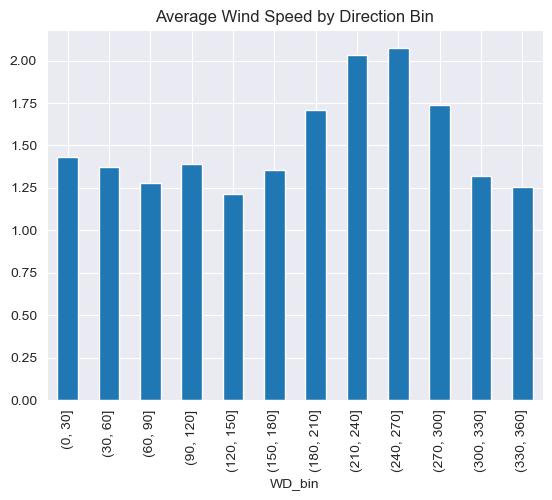

In [44]:
# Simple radial histogram (if no wind rose lib available)
sierraleone_clean['WD_bin'] = pd.cut(sierraleone_clean['WD'], bins=np.arange(0, 370, 30))
wind_dist = sierraleone_clean.groupby('WD_bin', observed=True)['WS'].mean()


wind_dist.plot(kind='bar', title='Average Wind Speed by Direction Bin')


Histograms for GHI and one other variable (e.g. WS).

Text(0.5, 1.0, 'Histogram of Wind Speed')

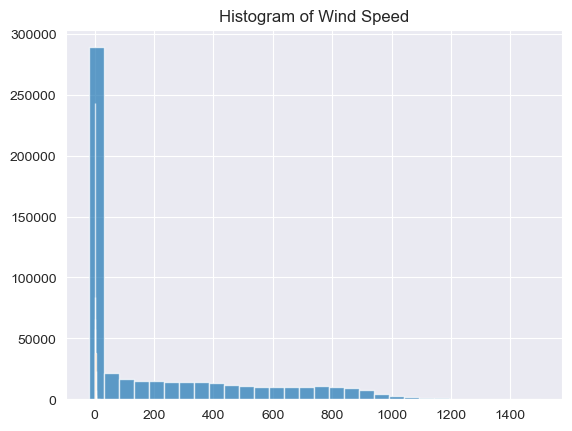

In [45]:
sierraleone_clean['GHI'].hist(bins=30, alpha=0.7)
plt.title("Histogram of GHI")

sierraleone_clean['WS'].hist(bins=30, alpha =0.7)
plt.title("Histogram of Wind Speed")


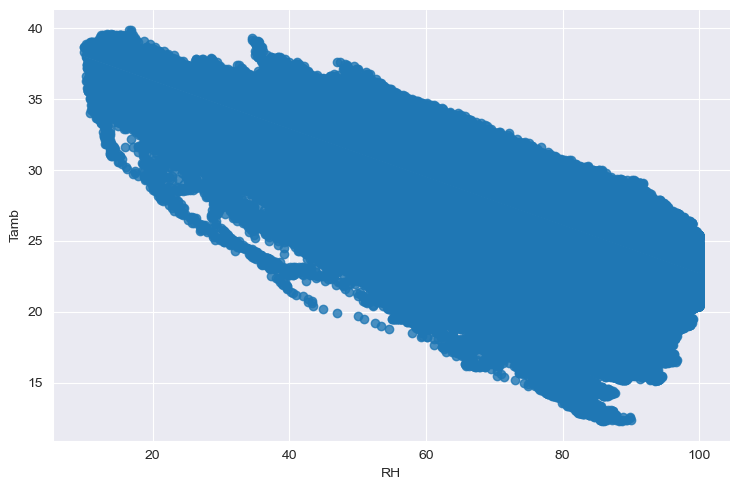

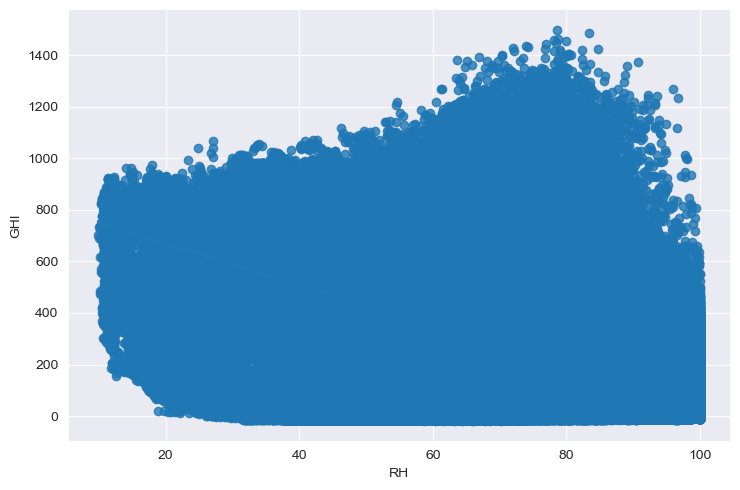

In [46]:
sns.lmplot(data=sierraleone_clean, x='RH', y='Tamb', height=5, aspect=1.5)
sns.lmplot(data=sierraleone_clean, x='RH', y='GHI', height=5, aspect=1.5)


Bubble chart

Text(0.5, 1.0, 'GHI vs Tamb with RH as Bubble Size')

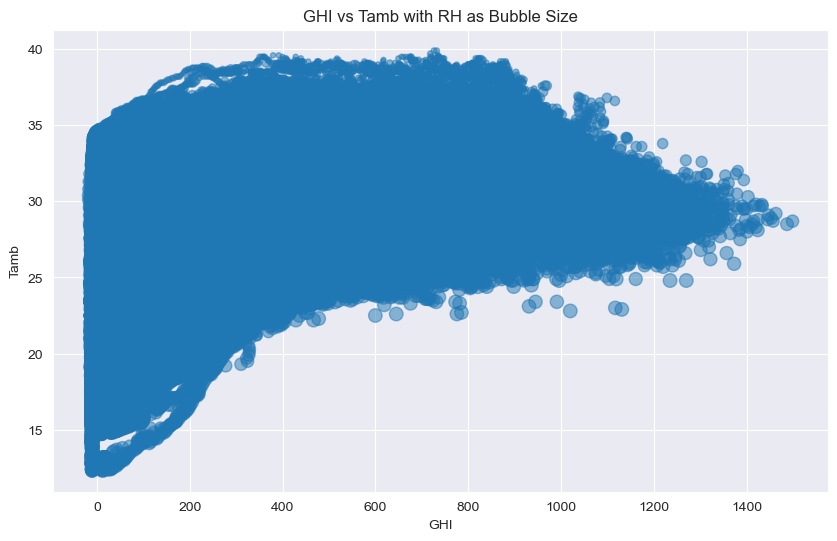

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(sierraleone_clean['GHI'], sierraleone_clean['Tamb'], s=sierraleone_clean['RH'], alpha=0.5, label="RH as Bubble Size")
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs Tamb with RH as Bubble Size")
